# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [4]:
# ファイルをダウンロードする
!wget https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!wget https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!wget https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

--2024-12-06 11:17:45--  https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 158711 (155K) [application/zip]
`794_ruby_4237.zip.1' に保存中

794_ruby_4237.zip.1 100%[===================>] 154.99K  --.-KB/s 時間 0.05s      

2024-12-06 11:17:45 (3.19 MB/s) - `794_ruby_4237.zip.1' へ保存完了 [158711/158711]

--2024-12-06 11:17:46--  https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 202267 (198K) [application/zip]
`1746_ruby_18324.zip' に保存中

1746_ruby_18324.zip 100%[===================>] 197.53K  --.-KB/s 時間 0.05s      

2024-12-06 11:17:46 (4.12 MB/s) - `1746_ruby_18324.zip' へ保存完了 [202267/202267]

--2024-12-

In [5]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [6]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [7]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [8]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

==> Downloading https://formulae.brew.sh/api/formula.jws.json

==> Downloading https://formulae.brew.sh/api/cask.jws.json

To reinstall 9.5, run:
  brew reinstall coreutils


In [9]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [10]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [11]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

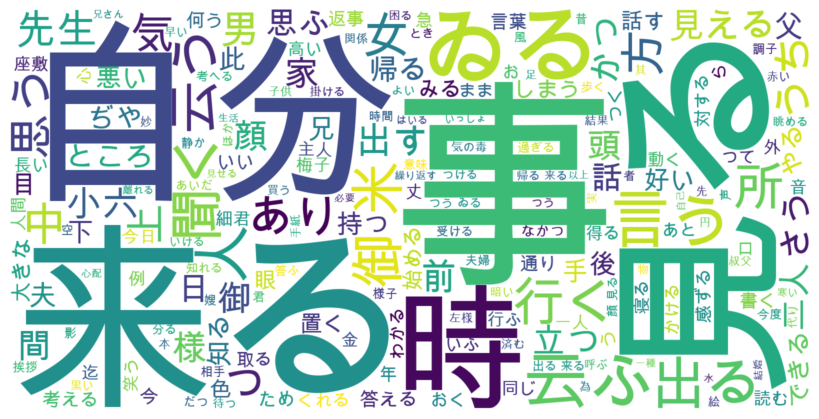

In [13]:
# your code goes here
import spacy

nlp = spacy.load("ja_ginza")

input_fn = "text/all.corpus.txt"
output_fn = "text/all.wakati.txt"

nlp = spacy.load("ja_ginza")

all_tokens = []
with open(input_fn, "r") as fin, open(output_fn, "w") as fout:
    for line in fin:
        tokens = [token for token in nlp(line.rstrip())]
        all_tokens.extend(tokens)

from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png", dpi=300)
plt.show()

## 共起ネットワーク

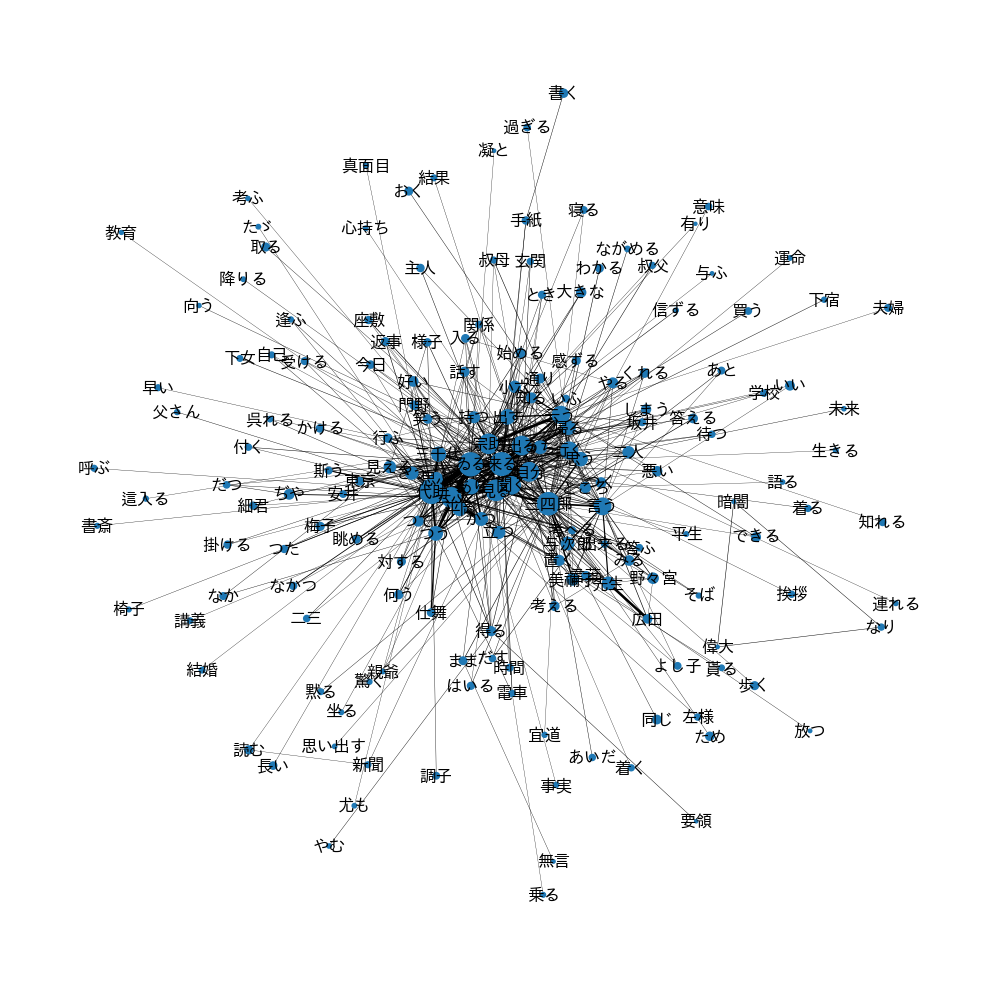

In [14]:
# your code goes here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import japanize_matplotlib

def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]

def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

G = create_network(words, word_counts, Xc, 0.01)
pyplot_network(G)

## 共起ヒートマップ

In [ ]:
# your code goes here

include_pos = ("NOUN", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]


columns = set(Xc.nonzero()[0])
columns_text = [words[i] for i in columns]

import pandas as pd

df = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns_text, columns=columns_text)

for cord, count in counter.items():
    df.iloc[cord] = count


In [ ]:
characters_sanshirou = ["三四郎", "広田", "野々宮", "佐々木", "与次郎", "美禰子", "先生", "原口", "里見"]
characters_sorekara = ["長井", "常次郎", "三千代", "菅沼", "門野"]
characters_mon = ["宗助", "御米", "小六", "安井", "坂井", "佐伯"]
characters = characters_sanshirou + characters_sorekara + characters_mon
df_characters = df[characters].filter(items=characters, axis=0)